# Carga de librerías

In [5]:
# Manipulacion de datos...
import pandas as pd
import numpy as np
# Visualizacion de datos...
import matplotlib.pyplot as plt
import seaborn as sns
# Modelo...
from sklearn.linear_model import LogisticRegression
# Metricas de evaluacion...
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import scikitplot as skplt
# No presentar advertencias...
import warnings
warnings.filterwarnings("ignore")
import os 

## Carga de datos

In [6]:
pd.set_option("display.max_columns",None) # Visualizar todas las columnas
df_preprocessing = pd.read_csv("../Data/Preprocessing/processed_data_.csv")
print(df_preprocessing.shape)
df_preprocessing.head()

(119390, 55)


,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,year_res_status_date,month_res_status_date,day_res_status_date,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_processed
0,0.0,0.275441,0.923077,0.105263,0.10,0.036364,0.0,0.0,0.0,0.0,0.0,0.013536,0.0,0.0,0.666667,1.000000,0.266667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.111262,0.538462,0.000000,0.06,0.036364,0.0,0.0,0.0,0.0,0.0,0.015330,0.0,0.0,0.333333,0.545455,0.500000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.033921,1.000000,0.000000,0.06,0.054545,0.0,0.0,0.0,0.0,0.0,0.012278,0.0,0.2,0.666667,1.000000,0.966667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.001357,0.192308,0.000000,0.02,0.018182,0.0,0.0,0.0,0.0,0.0,0.018752,0.0,0.0,0.666667,0.181818,0.300000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.094980,0.288462,0.105263,0.04,0.036364,0.0,0.0,0.0,0.0,0.0,0.021156,0.0,0.0,1.000000,0.272727,0.633333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
df_preprocessing.isnull().sum()
df_preprocessing = df_preprocessing.dropna()

In [8]:
df_preprocessing.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'year_res_status_date',
       'month_res_status_date', 'day_res_status_date', 'hotel_City Hotel',
       'hotel_Resort Hotel', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'reserved_room_type_A', 'reserved_room_type_B', 'r

In [9]:
##### VARIABLES QUE RESULTARON SIGNIFICATIVAS SEGUN LOGISTIC REGRESSION #########

# cliente previo
# cancelaciones previas
# adr
# 'required_car_parking_spaces'
# 'total_of_special_requests', 

### Particion variables dependientes e independientes.

In [10]:
X = df_preprocessing.drop(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 
       'previous_bookings_not_canceled','year_res_status_date',
       'month_res_status_date', 'day_res_status_date', 'hotel_City Hotel',
       'hotel_Resort Hotel', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'reserved_room_type_A', 'reserved_room_type_B', 'reserved_room_type_C',
       'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F',
       'reserved_room_type_G', 'reserved_room_type_H', 'reserved_room_type_L',
       'reserved_room_type_P', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'reservation_status_processed'],axis=1)
y = df_preprocessing["is_canceled"].values

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### Validando Shapes:

In [12]:
X_train.shape

(95508, 5)

In [13]:
X_test.shape

(23878, 5)

In [14]:
X_train.columns

Index(['is_repeated_guest', 'previous_cancellations', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

# Regresión Logística:

In [15]:
model_lr = LogisticRegression(random_state=42)
# Entrenamiento del modelo...
model_lr.fit(X_train,y_train)
# Predicciones...
y_pred_lr = model_lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))

0.679998324817824


# Redes neuronales:

In [16]:
from keras import models, layers, optimizers, regularizers
from keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.85:
      print("Lo logramos, nuestro modelo llego a 85%, detenemos el entrenamiento")
      self.model.stop_training = True

2023-03-22 21:45:19.233852: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 21:45:19.874701: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-22 21:45:19.874726: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-22 21:45:22.420690: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [17]:
# Modelo Redes neuronales con regulizers...
NN = models.Sequential()
# Capa de entrada...
NN.add(layers.Dense(64, activation = "relu", input_dim = X_train.shape[1],kernel_initializer="he_uniform"))

# DropOut... inactivando el 50% de las neuronas
NN.add(layers.Dropout(0.5))

# Anadiendo 2 capas mas (ocultas)...
NN.add(layers.Dense(32, activation = "relu",kernel_initializer="he_uniform")) # input ya se sabe q entra
NN.add(layers.Dense(16, activation = "relu",kernel_initializer="he_uniform")) # input ya se sabe q entra
NN.add(layers.Dense(8, activation = "relu",kernel_initializer="he_uniform")) # input ya se sabe q entra
# DropOut... inactivando el 40% de las neuronas
NN.add(layers.Dropout(0.4))
# Capa de salida con func activacion sigmoid por clasificacion binaria...
NN.add(layers.Dense(1, activation = "sigmoid"))

# optimizers...
opt = optimizers.SGD(lr=0.01, momentum=0.9)
# Compilar modelo...
# rmsprop version mejorada descenso gradiente:
NN.compile(optimizer="rmsprop", loss="binary_crossentropy",
             metrics="accuracy")

# Callback:
callback = TrainingCallback()
#callbacks= [callback] (poner despues de epochs en entrenamiento...)
# Entrenando...
history = NN.fit(X_train,y_train, epochs=50,
                   batch_size = 120, validation_data=(X_test,y_test))

2023-03-22 21:45:24.864348: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-22 21:45:24.865036: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-22 21:45:24.865245: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-22 21:45:24.865514: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-22 21:45:24.865605: W tensorflow/c

Epoch 1/50
796/796 [==============================] - 7s 6ms/step - loss: 0.6134 - accuracy: 0.6589 - val_loss: 0.5749 - val_accuracy: 0.6774
Epoch 2/50
796/796 [==============================] - 4s 5ms/step - loss: 0.5798 - accuracy: 0.6807 - val_loss: 0.5626 - val_accuracy: 0.6962
Epoch 3/50
796/796 [==============================] - 4s 5ms/step - loss: 0.5719 - accuracy: 0.6818 - val_loss: 0.5580 - val_accuracy: 0.6911
Epoch 4/50
796/796 [==============================] - 4s 5ms/step - loss: 0.5681 - accuracy: 0.6801 - val_loss: 0.5582 - val_accuracy: 0.6891
Epoch 5/50
796/796 [==============================] - 5s 7ms/step - loss: 0.5661 - accuracy: 0.6825 - val_loss: 0.5546 - val_accuracy: 0.6900
Epoch 6/50
796/796 [==============================] - 7s 8ms/step - loss: 0.5648 - accuracy: 0.6820 - val_loss: 0.5570 - val_accuracy: 0.6816
Epoch 7/50
796/796 [==============================] - 6s 8ms/step - loss: 0.5644 - accuracy: 0.6835 - val_loss: 0.5536 - val_accuracy: 0.6941
Epoch 

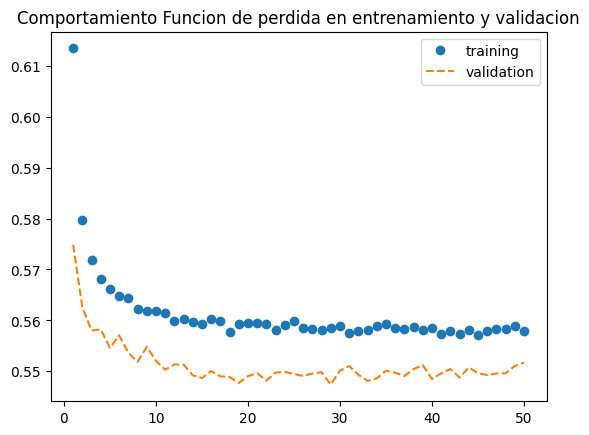

In [18]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# epocas igual a rango entre 1 y longitud loss values + 1 para rango en eje x
epochs = range(1,len(loss_values)+1)

# Grafica...
plt.plot(epochs,loss_values,"o",label="training")
plt.plot(epochs,val_loss_values,"--",label="validation")
plt.title("Comportamiento Funcion de perdida en entrenamiento y validacion")
plt.legend()
plt.show()

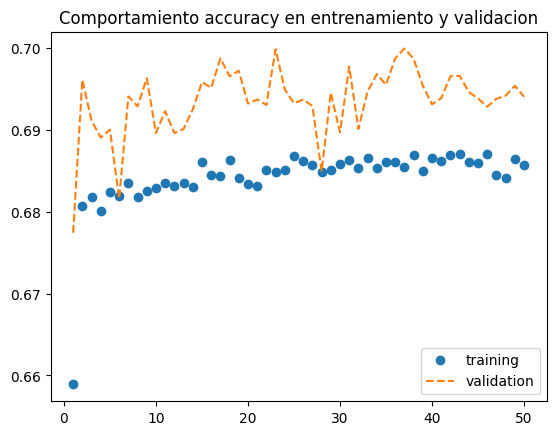

In [19]:
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]

# epocas igual a rango entre 1 y longitud loss values + 1 para rango en eje x
epochs = range(1,len(accuracy_values)+1)

# Grafica...
plt.plot(epochs,accuracy_values,"o",label="training")
plt.plot(epochs,val_accuracy_values,"--",label="validation")
plt.title("Comportamiento accuracy en entrenamiento y validacion")
plt.legend()
plt.show()

# Gradient Boosting Trees

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
# Optimizacion parametrica...
from sklearn.model_selection import RandomizedSearchCV

In [21]:
# Definir regressor...
# Se define sin ningun parametro para configurarlos

clf_gbt_opt = GradientBoostingClassifier(random_state=42)

# Definicon de grilla de parametros...
parametros = {
    "loss": ["los_loss","exponential"],
    "learning_rate": [0.001, 0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 5, 8, 10]
}

rand_est_gbt = RandomizedSearchCV(clf_gbt_opt, parametros, n_iter=5,
    cv=3, scoring="accuracy").fit(X_train,y_train)

print(rand_est_gbt.best_estimator_)

print("="*80)
print(rand_est_gbt.best_params_)

GradientBoostingClassifier(learning_rate=0.001, loss='exponential', max_depth=5,
                           n_estimators=200, random_state=42)
{'n_estimators': 200, 'max_depth': 5, 'loss': 'exponential', 'learning_rate': 0.001}


In [22]:
# Predicciones de la probabilidad de cancelaciones con el modelo
gbt_preds_opt = rand_est_gbt.predict_proba(X_test)

# Dataframes con probabilidades de cancelaciones predichas y datos reales
preds_df_opt = pd.DataFrame(gbt_preds_opt[:,1], columns = ['prob_canceled'])
true_df = pd.DataFrame(y_test, columns=["real_date_canceled"])

# Comparación de los dos marcos de datos
print(pd.concat([true_df.reset_index(drop = True), preds_df_opt], axis = 1))

       real_date_canceled  prob_canceled
0                     0.0       0.336570
1                     1.0       0.337571
2                     1.0       0.337571
3                     1.0       0.399183
4                     1.0       0.399183
...                   ...            ...
23873                 0.0       0.337571
23874                 1.0       0.466305
23875                 1.0       0.350614
23876                 0.0       0.350614
23877                 1.0       0.378306

[23878 rows x 2 columns]


In [23]:
# Predicciones...
gbt_preds_opt = rand_est_gbt.predict(X_test)

# Cadena de valores de los resulta
print(gbt_preds_opt)

[0. 0. 0. ... 0. 0. 0.]


In [24]:
# Reporte de clasificación del modelo
target_names = ['Non-Canceled', 'Canceled']
print(classification_report(y_test, gbt_preds_opt, target_names=target_names))

              precision    recall  f1-score   support

Non-Canceled       0.63      1.00      0.77     14963
    Canceled       0.00      0.00      0.00      8915

    accuracy                           0.63     23878
   macro avg       0.31      0.50      0.39     23878
weighted avg       0.39      0.63      0.48     23878



In [25]:
rand_est_gbt.classes_

array([0., 1.])

In [26]:
gbt_proba_opt = rand_est_gbt.predict_proba(X_test)
gbt_proba_opt

array([[0.66343031, 0.33656969],
       [0.66242859, 0.33757141],
       [0.66242859, 0.33757141],
       ...,
       [0.64938562, 0.35061438],
       [0.64938562, 0.35061438],
       [0.62169372, 0.37830628]])

<Figure size 1100x300 with 0 Axes>

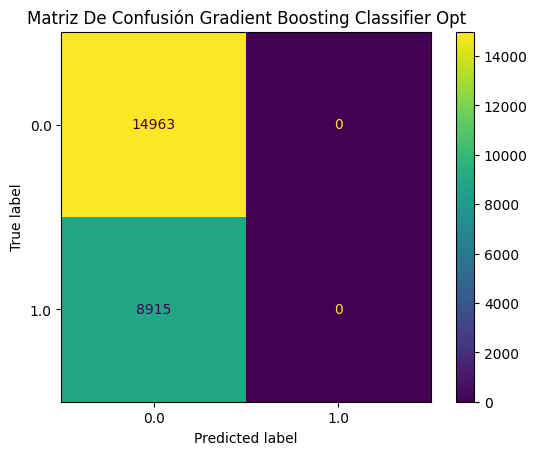

<Figure size 640x480 with 0 Axes>

In [33]:
fig = plt.figure(figsize=(11,3))
cm = confusion_matrix(y_test, gbt_preds_opt, labels=rand_est_gbt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rand_est_gbt.classes_)
disp.plot(cmap="viridis")
plt.title("Matriz De Confusión Gradient Boosting Classifier Opt")
plt.show()
module_path = os.path.dirname('__file__')
folder_path = os.path.join(module_path, "../App/static/images/Matriz_confusion.jpg")
plt.savefig(folder_path, format="jpg")



## Guardando modelo:

In [ ]:
from joblib import dump
dump(rand_est_gbt, "../App/models/gbt_model.pkl")

['../App/models/gbt_model.pkl']